In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task

For this task, you'll also be working with the happiness dataset.

In [4]:
happiness_2016 = pd.read_csv('https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab2/happiness_2016.csv')

In [5]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Plot the appropriate graphs that will answer the following questions:

1. How many countries are there per region?
2. Does money buy happiness?
3. Compare between the effect of life expectancy on happiness in top 50 countries vs bottom 50 countries
4. Compare between the distribution of GDP across regions
5. Compare between top 10 and bottom 10 countries in terms of the composition of the overall happiness score. More specifically, plot two graphs where the overall happiness score is divided into the seven parts corresponding to the columns: Economy, Family, Health, Freedom, Trust, Generosity, Dystopia.


## How many countires are there per region?

In [6]:
happiness_2016_countries = happiness_2016.Region.value_counts()
happiness_2016_countries

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

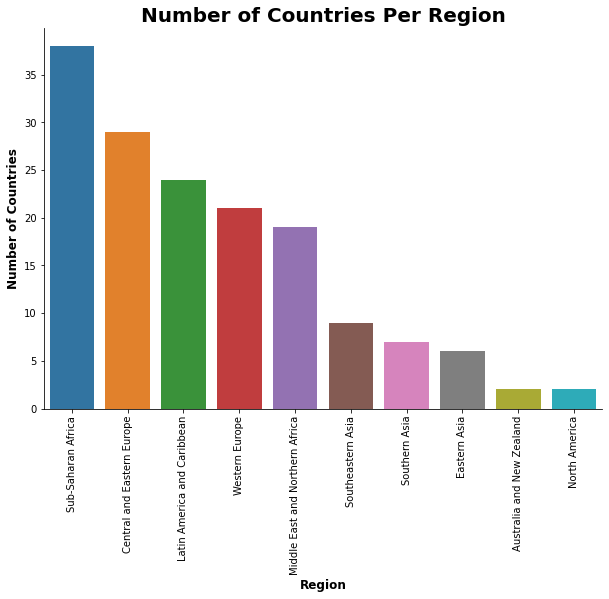

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x = happiness_2016_countries.index, y = happiness_2016_countries)
plt.xlabel('Region')
plt.xticks(rotation = 90, )
plt.ylabel('Number of Countries', fontsize=12, weight="bold")
plt.title('Number of Countries Per Region', fontsize = 20, fontweight="bold")
plt.xlabel("Region", fontsize=12, weight="bold")
sns.despine()
plt.show()

## Does money buy happiness?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


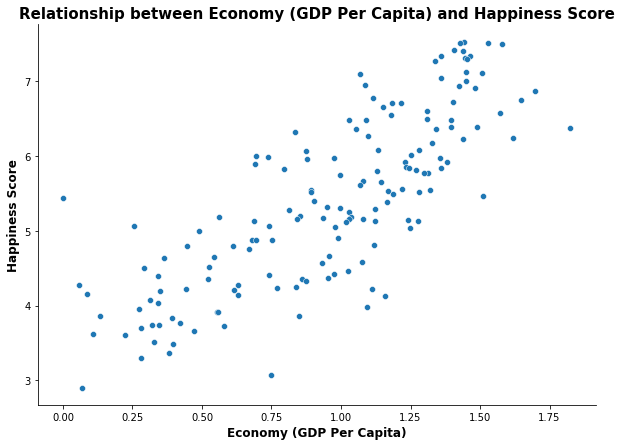

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(happiness_2016['Economy (GDP per Capita)'], happiness_2016['Happiness Score'])
plt.title("Relationship between Economy (GDP Per Capita) and Happiness Score", fontsize=15, weight="bold")
plt.xlabel("Economy (GDP Per Capita)", fontsize=12, fontweight="bold")
plt.ylabel("Happiness Score", fontsize=12, fontweight="bold")
sns.despine()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


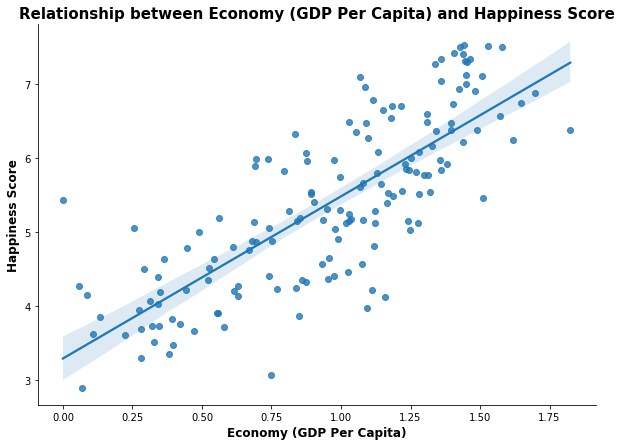

In [39]:
plt.figure(figsize=(10,7))
sns.regplot(happiness_2016['Economy (GDP per Capita)'], happiness_2016['Happiness Score'])
plt.title("Relationship between Economy (GDP Per Capita) and Happiness Score", fontsize=15, weight="bold")
plt.xlabel("Economy (GDP Per Capita)", fontsize=12, fontweight="bold")
plt.ylabel("Happiness Score", fontsize=12, fontweight="bold")
sns.despine()
plt.show()

## Compare between the effect of life expectancy on happiness in top 50 countries vs bottom 50 countries

In [11]:
top_50_countries = happiness_2016[:50]
bottom_50_countries = happiness_2016[-50:]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


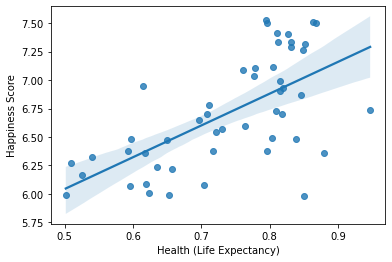

In [12]:
sns.regplot(top_50_countries['Health (Life Expectancy)'], top_50_countries['Happiness Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


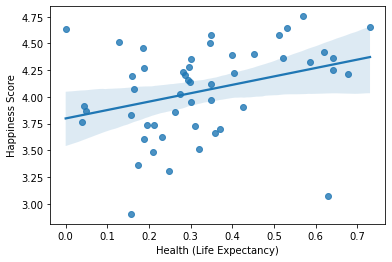

In [13]:
sns.regplot(bottom_50_countries['Health (Life Expectancy)'], bottom_50_countries['Happiness Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


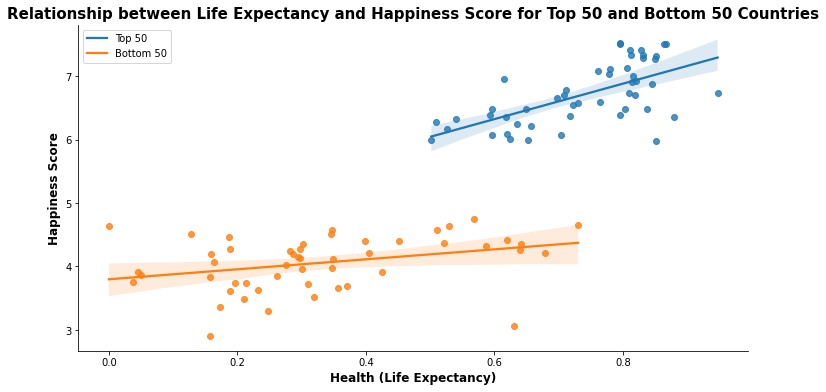

In [25]:
plt.figure(figsize=(12,6))
sns.regplot(top_50_countries['Health (Life Expectancy)'], top_50_countries['Happiness Score'])
sns.regplot(bottom_50_countries['Health (Life Expectancy)'], bottom_50_countries['Happiness Score'])
sns.despine()
plt.ylabel("Happiness Score",fontsize=12, fontweight="bold")
plt.xlabel("Health (Life Expectancy)",fontsize=12, fontweight="bold")
plt.title("Relationship between Life Expectancy and Happiness Score for Top 50 and Bottom 50 Countries", fontsize=15, weight="bold")
plt.legend(labels=["Top 50", "Bottom 50"], loc="upper left", )
plt.show()

The relationship between life expectancy and happiness score is stronger for happier countries.

## Compare between the distribution of GDP across regions

You can choose to compare between the probability distributions like below.

<Figure size 864x432 with 0 Axes>

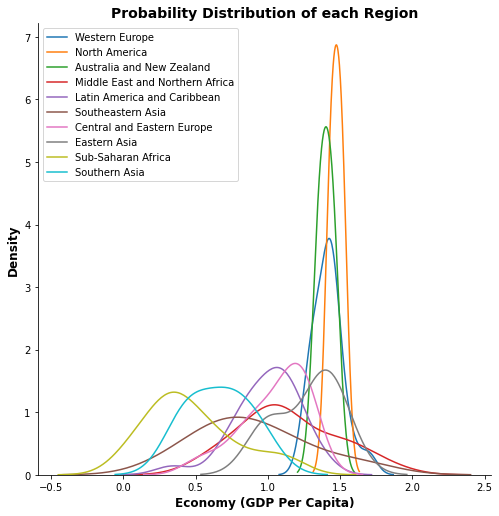

In [35]:
plt.figure(figsize=(12,6))
sns.FacetGrid(happiness_2016, hue="Region", height=7).map(sns.kdeplot, "Economy (GDP per Capita)")
plt.title("Probability Distribution of each Region", fontsize=14, weight="bold")
plt.xlabel("Economy (GDP Per Capita)",fontsize=12, fontweight="bold")
plt.ylabel("Density",fontsize=12, fontweight="bold")
plt.legend()
plt.show()

##  Compare between top 10 and bottom 10 countries in terms of the composition of the overall happiness score. 

More specifically, plot two graphs where the overall happiness score is divided into the seven parts corresponding to the columns:
Economy,
Family,
Health,
Freedom,
Trust,
Generosity, Dystopia.

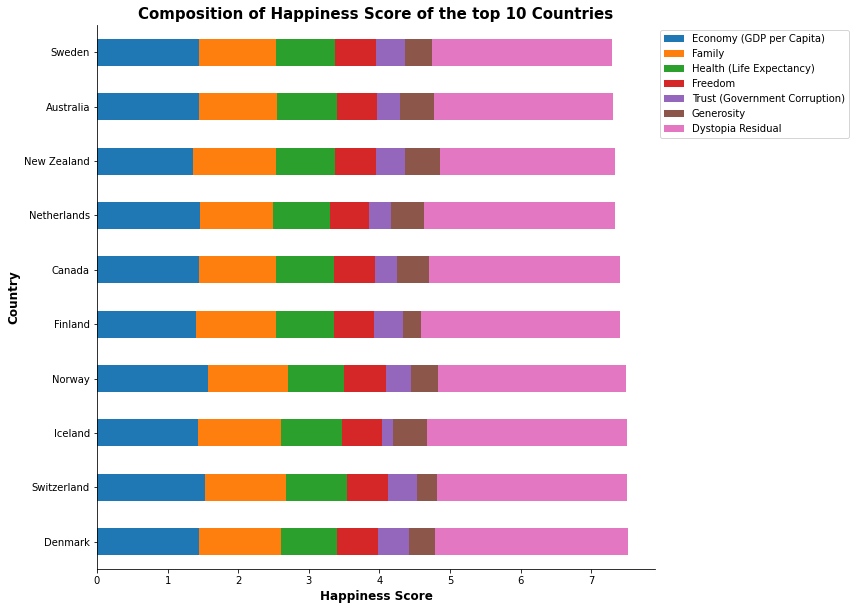

In [31]:
happiness_2016 = happiness_2016.set_index("Country")
happiness_2016[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']].head(10).plot(kind='barh', stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score", fontsize=12, fontweight="bold")
plt.ylabel("Country", fontsize=12, fontweight="bold")
plt.title('Composition of Happiness Score of the top 10 Countries', fontsize=15, weight="bold")
plt.legend(bbox_to_anchor=(1, 1), loc=2) #bbox_to_anchor is used when we want to place the legend outside the plot
sns.despine()
plt.show()

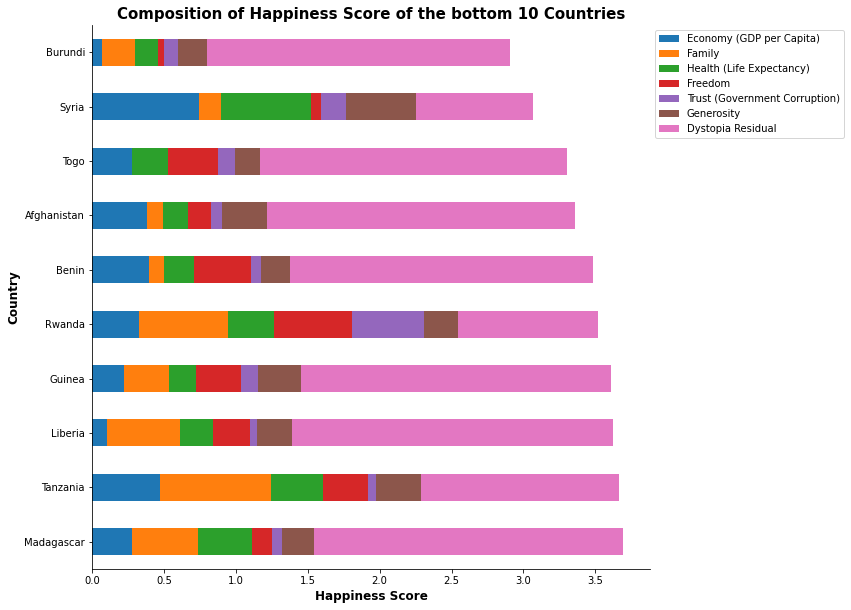

In [29]:
happiness_2016[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']].tail(10).plot(kind='barh', stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score", fontsize=12, fontweight="bold")
plt.ylabel("Country", fontsize=12, fontweight="bold")
plt.title('Composition of Happiness Score of the bottom 10 Countries', fontsize=15, weight="bold")
plt.legend(bbox_to_anchor=(1, 1), loc=2) #bbox_to_anchor is used when we want to place the legend outside the plot
sns.despine()
plt.show()

----